In [ ]:
!pip install transformers -q

In [ ]:
from transformers import pipeline

In [ ]:
# tokenizer = RobertaTokenizerFast.from_pretrained("arpanghoshal/EmoRoBERTa")
# model = TFRobertaForSequenceClassification.from_pretrained("arpanghoshal/EmoRoBERTa")

In [ ]:
emotion = pipeline('sentiment-analysis', model='arpanghoshal/EmoRoBERTa')

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at arpanghoshal/EmoRoBERTa.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.


In [ ]:
emot = emotion("future first")

In [ ]:
emot  

[{'label': 'neutral', 'score': 0.9977824091911316}]

In [ ]:
emot[0]['label']

'neutral'

In [ ]:
import pandas as pd

In [ ]:
sin = pd.read_csv('/content/emo.csv')

In [ ]:
sin


,text
0,"Remember what she said in my last letter? """
1,If I wasn't working here.
2,".."""
3,Goodwill helps people get off of public assist...
4,Sherry learned through our Future Works class ...
...,...
10057,Please let it be a constant reminder of all yo...
10058,That’s why I want to extend my appreciation fo...
10059,And why I’m writing you today to ask you to re...
10060,"In fact, I want to urge you to strengthen your..."


In [ ]:
sin.head()

,text
0,"Remember what she said in my last letter? """
1,If I wasn't working here.
2,".."""
3,Goodwill helps people get off of public assist...
4,Sherry learned through our Future Works class ...


In [ ]:
sin.shape

(10062, 1)

In [ ]:
sin.dtypes

text    object
dtype: object

In [ ]:
sin.isnull().sum()

text    0
dtype: int64

In [ ]:
sin=sin[:998]

In [ ]:
sin

,text
0,"Remember what she said in my last letter? """
1,If I wasn't working here.
2,".."""
3,Goodwill helps people get off of public assist...
4,Sherry learned through our Future Works class ...
...,...
993,"It is the right message, sent while it is stil..."
994,"The governor, like Mayor Michael Bloomberg, no..."
995,While rethinking the plans will delay the orig...
996,and the Port Authority of New York and New Jer...


In [ ]:
sin.head()

,text
0,"Remember what she said in my last letter? """
1,If I wasn't working here.
2,".."""
3,Goodwill helps people get off of public assist...
4,Sherry learned through our Future Works class ...


In [ ]:
sin['text'][1:910].apply(emotion)

1      [{'label': 'neutral', 'score': 0.9974838495254...
2      [{'label': 'neutral', 'score': 0.9815627336502...
3      [{'label': 'neutral', 'score': 0.6974198222160...
4      [{'label': 'optimism', 'score': 0.575617611408...
5      [{'label': 'approval', 'score': 0.426311522722...
                             ...                        
905    [{'label': 'realization', 'score': 0.851272702...
906    [{'label': 'anger', 'score': 0.8385772109031677}]
907    [{'label': 'neutral', 'score': 0.9235056042671...
908    [{'label': 'realization', 'score': 0.796401500...
909    [{'label': 'neutral', 'score': 0.9933283329010...
Name: text, Length: 909, dtype: object

In [ ]:
def get_emotion_label(text):
  return (emotion(text)[0]['label'])

In [ ]:
sin['text'][1:910].apply(get_emotion_label)

1          neutral
2          neutral
3          neutral
4         optimism
5         approval
          ...     
905    realization
906          anger
907        neutral
908    realization
909        neutral
Name: text, Length: 909, dtype: object

In [ ]:
sin['emotion']=sin['text'].apply(get_emotion_label)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
sin

,text,emotion
0,"Remember what she said in my last letter? """,neutral
1,If I wasn't working here.,neutral
2,"..""",neutral
3,Goodwill helps people get off of public assist...,neutral
4,Sherry learned through our Future Works class ...,optimism
...,...,...
993,"It is the right message, sent while it is stil...",approval
994,"The governor, like Mayor Michael Bloomberg, no...",approval
995,While rethinking the plans will delay the orig...,neutral
996,and the Port Authority of New York and New Jer...,neutral


In [ ]:
import seaborn as sns

Text(0.5, 1.0, 'Emotion Distribution')

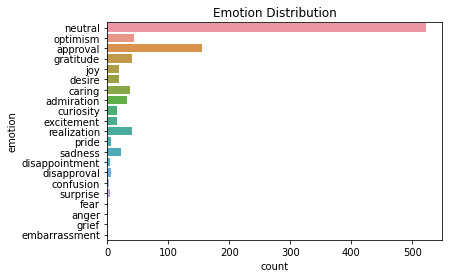

In [ ]:
sns.countplot(data=sin,y='emotion').set_title("Emotion Distribution")